### Initializing libraries and extracting data

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import warnings
import numpy as np

In [2]:
warnings.filterwarnings('ignore')

In [3]:
train=pd.read_csv("C:/Users/chhay/OneDrive/Desktop/Projects/Task12/train.csv")

In [4]:
train.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,B37
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,B61
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77,A19
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,A22
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,A33


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36752 entries, 0 to 36751
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   T1      36752 non-null  int64 
 1   T2      36752 non-null  int64 
 2   T3      36752 non-null  int64 
 3   T4      36752 non-null  int64 
 4   T5      36752 non-null  int64 
 5   T6      36752 non-null  int64 
 6   T7      36752 non-null  int64 
 7   T8      36752 non-null  int64 
 8   T9      36752 non-null  int64 
 9   T10     36752 non-null  int64 
 10  T11     36752 non-null  int64 
 11  T12     36752 non-null  int64 
 12  T13     36752 non-null  int64 
 13  T14     36752 non-null  int64 
 14  T15     36752 non-null  int64 
 15  T16     36752 non-null  int64 
 16  T17     36752 non-null  int64 
 17  T18     36752 non-null  int64 
 18  target  36752 non-null  object
dtypes: int64(18), object(1)
memory usage: 5.3+ MB


In [6]:
train.describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
count,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000
mean,-65.865449,-64.521931,-64.574472,-65.296474,-64.462152,-63.318731,-67.030202,-66.591260,-65.692479,-65.555181,-65.681922,-66.244204,-63.962614,-64.399080,-64.550011,-64.136782,-65.910726,-66.590417
std,8.737286,8.914559,8.154517,8.142803,8.068375,8.651501,9.257529,10.160193,10.598247,10.408147,9.453958,8.866239,8.254217,9.562839,9.207343,10.540542,10.071973,10.600992
min,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000
25%,-72.000000,-70.000000,-70.000000,-70.000000,-69.000000,-69.000000,-74.000000,-75.000000,-73.000000,-73.000000,-71.000000,-72.000000,-69.000000,-70.000000,-70.000000,-71.000000,-72.000000,-74.000000
50%,-66.000000,-65.000000,-64.000000,-66.000000,-65.000000,-63.000000,-66.000000,-66.000000,-65.000000,-65.000000,-65.000000,-66.000000,-63.000000,-64.000000,-65.000000,-63.000000,-65.000000,-66.000000
75%,-61.000000,-59.000000,-59.000000,-61.000000,-59.000000,-57.000000,-60.000000,-59.000000,-58.000000,-58.000000,-59.000000,-61.000000,-58.000000,-58.000000,-58.000000,-57.000000,-59.000000,-59.000000
max,-41.000000,-37.000000,-41.000000,-39.000000,-36.000000,-39.000000,-45.000000,-39.000000,-39.000000,-37.000000,-40.000000,-43.000000,-43.000000,-39.000000,-38.000000,-40.000000,-43.000000,-39.000000


<Axes: >

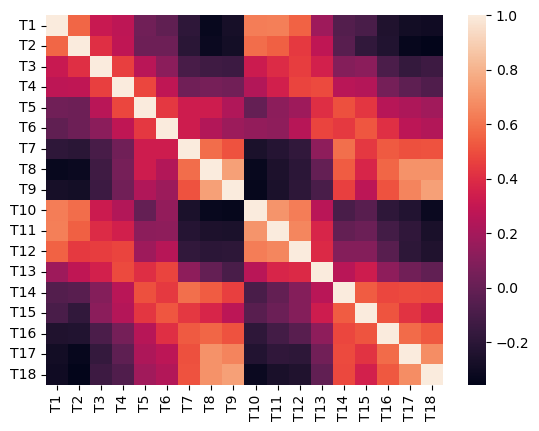

In [7]:
sns.heatmap(train.corr())

<Axes: >

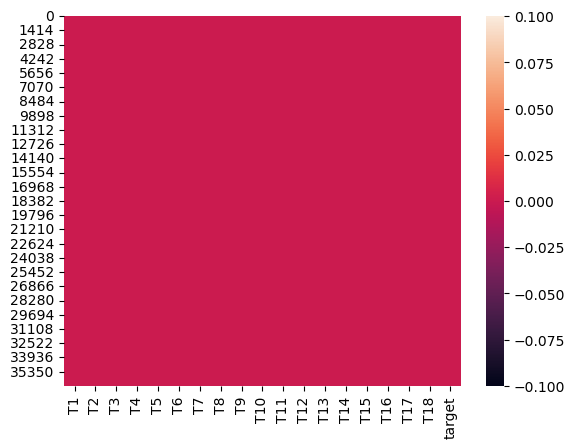

In [8]:
sns.heatmap(train.isnull())

In [9]:
train.columns

Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11',
       'T12', 'T13', 'T14', 'T15', 'T16', 'T17', 'T18', 'target'],
      dtype='object')

### Feature Selection 

In [10]:
train['target'].unique

<bound method Series.unique of 0        B37
1        B61
2        A19
3        A22
4        A33
        ... 
36747    B34
36748    B15
36749     A6
36750     B2
36751    B45
Name: target, Length: 36752, dtype: object>

In [11]:
train=train.drop('target',axis=1)

### Determining the value of k

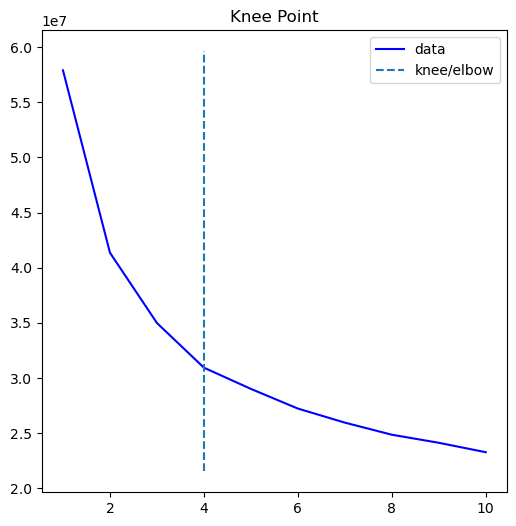

In [12]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(train)
    wcss.append(kmeans.inertia_)
el=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
el.plot_knee()

### Making Model

In [13]:
## Splitting data into train and test set
train_x,test_x=train_test_split(train,test_size=0.25)
model=KMeans(n_clusters=4,init='k-means++')
train_y=model.fit(train_x)

### Predicting our model on test data

In [14]:
#Checking performance of the model
from sklearn.metrics import silhouette_score
score=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(train_x)
    s=silhouette_score(train_x,kmeans.labels_)
    score.append(s)


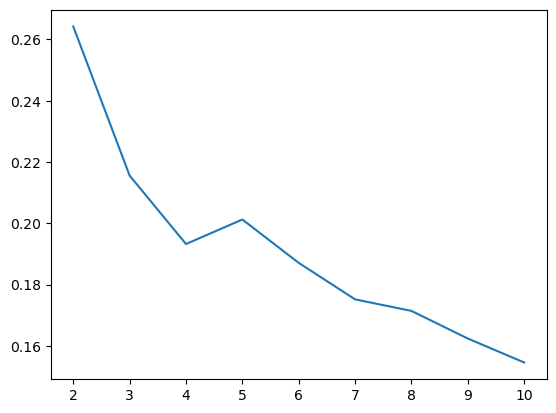

In [15]:
#Plotting silhouette score
plt.plot(range(2,11),score)
plt.show()

In [16]:
y_pred=model.predict(test_x)
y_pred

array([0, 1, 0, ..., 0, 3, 2])

In [21]:
### Getting an input from user and predicting which cluster it will belong to
val=[]
def get_input():
    print("Enter values for T1 to T18 (Enter 18 values):")
    for i in range(18):
        globals()['val'].append(int(input()))
get_input()
val=np.reshape(val,(1,18))
pred=model.predict(val)
print("This value belongs to cluster: ",pred)
flag=1
while(flag):
    res=input("Do you want to enter another data (Enter y for yes): ")
    if res[0]=='y' or res[0]=='Y':
        get_input()
    else:
        flag=0

Enter values for T1 to T18 (Enter 18 values):
58
56
59
59
51
55
55
66
2
3
58
56
59
59
52
45
45
85
This value belongs to cluster:  [0]
Do you want to enter another data (Enter y for yes): n
